# Data Collection
Initial cleaning based on first check through spreadsheet viewing

## Global Economic and Social Indicators
The economic and social indicators dataset came from the [World Bank Group DataBank](https://databank.worldbank.org/source/world-development-indicators)

In [288]:
import pandas as pd

# World Bank data in csv
indicators = pd.read_csv('WorldBank - Data.csv')
indicators.columns = indicators.columns.str.strip().str.lower().str.replace(' ', '_') # clean headers
indicators = indicators.map(lambda x: x.strip() if isinstance(x, str) else x)


# Keep rows from 2013 to 2023 only
indicators['time'] = pd.to_numeric(indicators['time'], errors='coerce').astype('Int64')
indicators = indicators[(indicators['time'] >= 2013) & (indicators['time'] <= 2023)]
indicators = indicators.rename(columns={'time': 'indicator_year', 'country_name':'country'})

# Remove redundant columns
indicators = indicators.drop(columns=['time_code', 'country_code'])
indicators.head()

,indicator_year,country,"population,_total_[sp.pop.totl]",population_growth_(annual_%)_[sp.pop.grow],"government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]","school_enrollment,_primary_(%_gross)_[se.prm.enrr]","school_enrollment,_secondary_(%_gross)_[se.sec.enrr]","school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]","labor_force_participation_rate,_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)_[sl.tlf.cact.zs]","unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]",...,gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg],"gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]","inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]",taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn],scientific_and_technical_journal_articles_[ip.jrn.artc.sc],merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",government_effectiveness:_estimate_[ge.est],control_of_corruption:_estimate_[cc.est],rule_of_law:_estimate_[rl.est]
2170,2013,Argentina,4.258246e+07,0.9929589897,5.436610222,114.5092392,104.5967484,78.7686615,59.962,7.1,...,2.405323781,19500,..,210696000000,7945.07,27.24604172,9821661858,-0.2542369664,-0.434306711,-0.6563286185
2171,2013,Australia,2.312813e+07,1.72115144,5.519627094,105.8025818,..,..,65.025,5.663,...,2.602193394,44790,2.449888641,86713000000,50921.2,31.39393038,54472699004,1.632453084,1.777833104,1.770100832
2172,2013,Brazil,1.984783e+08,0.8105116475,5.838850021,109.945137,103.9176788,44.33937073,64.314,7.071,...,3.004822669,15500,6.204310666,335282244869,50197.15,19.60620227,75211029129,-0.1190309748,-0.09795960784,-0.09204520285
2173,2013,China,1.363240e+09,0.6660729777,4.129804134,102.9309082,..,32.76203156,69.97,4.6,...,7.766150098,11910,2.621050017,3766687010000,355650.59,43.45653366,290928431467,-0.005120689515,-0.3558876514,-0.5258893967
2174,2013,France,6.599793e+07,0.516915013,5.492893696,102.2764435,104.3766022,59.8487587,56.27,9.913,...,0.7817564459,40410,0.8637154979,205806000000,73455.58,44.82937532,33461592994,1.482052445,1.304333687,1.402362823


## Global University Rankings
The QS World Rankings from 2025 to 2015 data were downloaded from [UniversityRankings.ch](https://www.universityrankings.ch/results/QS/2025)

In [289]:
# University Rankings base file name: results-ranking-QS-region-World-year-{year}-q-export.csv
rankings_dfs = []

for year in range(2015, 2026):
    df = pd.read_csv(f'results-ranking-QS-region-World-year-{year}-q-export.csv')
    if '   ' in df.columns: df.drop('   ', axis=1, inplace=True) # remove blank column
    df['year'] = year # add year column
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') # clean headers
    rankings_dfs.append(df)

rankings = pd.concat(rankings_dfs, ignore_index=True)

rankings.columns = rankings.columns.str.strip().str.lower().str.replace(' ', '_') # clean headers
rankings = rankings.rename(columns={'year': 'ranking_year'})
str_cols = ['world_rank', 'institution', 'country']
rankings[str_cols] = rankings[str_cols].astype(str)
rankings = rankings.map(lambda x: x.strip() if isinstance(x, str) else x) # remove extra space from elements
print(rankings.dtypes)
rankings.head()

world_rank      object
institution     object
country         object
ranking_year     int64
dtype: object


,world_rank,institution,country,ranking_year
0,1,Massachusetts Institute of Technology - MIT,USA,2015
1,2,Imperial College London,UK,2015
2,2,University of Cambridge,UK,2015
3,4,Harvard University,USA,2015
4,5,University College London,UK,2015


# Data Preprocessing
First step is to make sure the country names match for both datasets, then remove countries that do not appear in any of the rankings anc countries that do not have indicators.

In [290]:
# See if country names match
print("indicator countries: ", sorted(indicators['country'].unique()))
print("ranking countries: ", sorted(rankings['country'].unique()))

indicator countries:  ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia, The', 'Georgia

In [291]:
# Rename countries
rankings_renamed = rankings.copy()
rankings_renamed['country'] = rankings_renamed['country'].replace("USA", "United States")
rankings_renamed['country'] = rankings_renamed['country'].replace("UK", "United Kingdom")
rankings_renamed['country'] = rankings_renamed['country'].replace("Brunei", "Brunei Darussalam")
rankings_renamed['country'] = rankings_renamed['country'].replace("Czech Republic", "Czechia")
rankings_renamed['country'] = rankings_renamed['country'].replace('Egypt', "Egypt, Arab Rep.")
rankings_renamed['country'] = rankings_renamed['country'].replace('Hong Kong', "Hong Kong SAR, China")
rankings_renamed['country'] = rankings_renamed['country'].replace('Iran', "Iran, Islamic Rep.")
rankings_renamed['country'] = rankings_renamed['country'].replace('Kyrgyzstan', "Kyrgyz Republic")
rankings_renamed['country'] = rankings_renamed['country'].replace('Macao', "Macao SAR, China")
rankings_renamed['country'] = rankings_renamed['country'].replace('Macau', "Macao SAR, China")
rankings_renamed['country'] = rankings_renamed['country'].replace('Russia', "Russian Federation")
rankings_renamed['country'] = rankings_renamed['country'].replace('Slovakia', "Slovak Republic")
rankings_renamed['country'] = rankings_renamed['country'].replace('South Korea', "Korea, Rep.")
rankings_renamed['country'] = rankings_renamed['country'].replace('Turkey', "Turkiye")
rankings_renamed['country'] = rankings_renamed['country'].replace('Venezuela', "Venezuela, RB")

# Remove Palestine and Taiwan from rankings: Palestine's and Taiwan's indicators are not found in the original dataset
rankings_renamed = rankings_renamed[rankings_renamed['country'] != 'Palestine']
rankings_renamed = rankings_renamed[rankings_renamed['country'] != 'Taiwan']

# Remove indicator countries that are not in the rankings
indicators_trimmed = indicators[indicators['country'].isin(rankings_renamed['country'])]

print("indicator countries: ", sorted(indicators_trimmed['country'].unique()))
print("ranking countries: ", sorted(rankings_renamed['country'].unique()))
print(len(indicators_trimmed['country'].unique()) - len(rankings_renamed['country'].unique()))

indicator countries:  ['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lithuania', 'Luxembourg', 'Macao SAR, China', 'Malaysia', 'Malta', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovak R

## Indicators

### Fill Nulls
Fill missing values using interpolation, forward fill, and backward fill. Filling should be per country.

In [292]:
import numpy as np

# Format null values
indicators_trimmed = indicators_trimmed.reset_index(drop=True)
indicators_trimmed = indicators_trimmed.replace('..', np.nan)

indicators_trimmed.isnull().sum()

indicator_year                                                                                                      0
country                                                                                                             0
population,_total_[sp.pop.totl]                                                                                     0
population_growth_(annual_%)_[sp.pop.grow]                                                                          0
government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]                                         211
school_enrollment,_primary_(%_gross)_[se.prm.enrr]                                                                138
school_enrollment,_secondary_(%_gross)_[se.sec.enrr]                                                              192
school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]                                                               175
labor_force_participation_rate,_total_(%_of_total_popula

In [293]:
# Make sure datatypes are correct
cols_to_float = indicators_trimmed.columns.difference(['indicator_year', 'country'])

indicators_trimmed[cols_to_float] = indicators_trimmed[cols_to_float].apply(pd.to_numeric, errors='coerce').astype('float64')
indicators_trimmed['indicator_year'] = indicators_trimmed['indicator_year'].apply(pd.to_numeric, errors='coerce').astype('int64')


indicators_trimmed.dtypes

indicator_year                                                                                                      int64
country                                                                                                            object
population,_total_[sp.pop.totl]                                                                                   float64
population_growth_(annual_%)_[sp.pop.grow]                                                                        float64
government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]                                         float64
school_enrollment,_primary_(%_gross)_[se.prm.enrr]                                                                float64
school_enrollment,_secondary_(%_gross)_[se.sec.enrr]                                                              float64
school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]                                                               float64
labor_force_participatio

In [294]:
# fill missing values in indicator dataset (fill per country)
indicators_trimmed = indicators_trimmed.sort_values(['country', 'indicator_year'])

filled_cols = (
    indicators_trimmed
    .groupby('country')[cols_to_float]
    .apply(lambda group: group.interpolate(method='linear').ffill().bfill())
    .reset_index(drop= True)
)

In [295]:
# Check trimmed indicators df
indicators_trimmed

,indicator_year,country,"population,_total_[sp.pop.totl]",population_growth_(annual_%)_[sp.pop.grow],"government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]","school_enrollment,_primary_(%_gross)_[se.prm.enrr]","school_enrollment,_secondary_(%_gross)_[se.sec.enrr]","school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]","labor_force_participation_rate,_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)_[sl.tlf.cact.zs]","unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]",...,gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg],"gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]","inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]",taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn],scientific_and_technical_journal_articles_[ip.jrn.artc.sc],merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",government_effectiveness:_estimate_[ge.est],control_of_corruption:_estimate_[cc.est],rule_of_law:_estimate_[rl.est]
0,2013,Argentina,42582455.0,0.992959,5.436610,114.509239,104.596748,78.768661,59.962,7.100,...,2.405324,19500.0,NaN,2.106960e+11,7945.07,27.246042,9.821662e+09,-0.254237,-0.434307,-0.656329
97,2014,Argentina,43024071.0,1.031744,5.361440,113.961883,106.092133,81.169411,59.444,7.268,...,-2.512615,19090.0,NaN,2.822934e+11,8330.40,25.486412,5.065336e+09,-0.111114,-0.549791,-0.866627
194,2015,Argentina,43477012.0,1.047259,5.776110,113.778198,107.549072,83.762581,59.232,7.579,...,2.731160,19530.0,NaN,3.694181e+11,8393.72,19.670305,1.175899e+10,-0.049476,-0.581265,-0.748636
291,2016,Argentina,43900313.0,0.968911,5.545490,112.944267,109.645943,86.617882,59.020,8.085,...,-2.080328,19660.0,NaN,4.789102e+11,8601.99,20.404557,3.260164e+09,0.218796,-0.299236,-0.320160
388,2017,Argentina,44288894.0,0.881250,5.454320,111.681457,110.412407,89.232941,58.808,8.347,...,2.818503,22790.0,NaN,6.247893e+11,8793.98,19.511414,1.151686e+10,0.135086,-0.309002,-0.237312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2019,Viet Nam,97173776.0,0.968367,3.084998,117.423350,93.153778,28.506929,76.614,1.681,...,7.359263,10480.0,2.795824,NaN,6113.19,154.819009,1.612000e+10,0.027881,-0.546221,-0.050393
775,2020,Viet Nam,98079191.0,0.927434,3.216529,119.024053,93.789948,NaN,74.367,2.103,...,2.865413,11110.0,3.220934,NaN,8265.78,157.329844,1.580000e+10,0.193558,-0.374517,-0.189502
872,2021,Viet Nam,98935098.0,0.868884,2.945175,120.023386,96.066743,38.873238,73.696,2.385,...,2.553729,11430.0,1.834716,NaN,9651.04,182.395375,1.566000e+10,0.243436,-0.308163,-0.172222
969,2022,Viet Nam,99680655.0,0.750757,2.887387,123.133724,97.249476,42.224239,74.482,1.523,...,8.123514,13180.0,3.156508,NaN,10530.19,178.014435,1.790000e+10,0.174635,-0.287254,-0.158469


In [296]:
# Check filled indicators df
filled_cols

,access_to_electricity_(%_of_population)_[eg.elc.accs.zs],"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]",control_of_corruption:_estimate_[cc.est],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",gdp_(current_us$)_[ny.gdp.mktp.cd],gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg],"gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]",government_effectiveness:_estimate_[ge.est],"government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]","inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]",...,merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs],"population,_total_[sp.pop.totl]",population_growth_(annual_%)_[sp.pop.grow],rule_of_law:_estimate_[rl.est],"school_enrollment,_primary_(%_gross)_[se.prm.enrr]","school_enrollment,_secondary_(%_gross)_[se.sec.enrr]","school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]",scientific_and_technical_journal_articles_[ip.jrn.artc.sc],taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn],"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]"
0,99.3,66.104,-0.434307,9.821662e+09,5.520251e+11,2.405324,19500.0,-0.254237,5.436610,NaN,...,27.246042,42582455.0,0.992959,-0.656329,114.509239,104.596748,78.768661,7945.07,2.106960e+11,7.100
1,100.0,66.613,-0.549791,5.065336e+09,5.263197e+11,-2.512615,19090.0,-0.111114,5.361440,NaN,...,25.486412,43024071.0,1.031744,-0.866627,113.961883,106.092133,81.169411,8330.40,2.822934e+11,7.268
2,99.7,63.879,-0.581265,1.175899e+10,5.947493e+11,2.731160,19530.0,-0.049476,5.776110,NaN,...,19.670305,43477012.0,1.047259,-0.748636,113.778198,107.549072,83.762581,8393.72,3.694181e+11,7.579
3,99.9,58.790,-0.299236,3.260164e+09,5.575323e+11,-2.080328,19660.0,0.218796,5.545490,NaN,...,20.404557,43900313.0,0.968911,-0.320160,112.944267,109.645943,86.617882,8601.99,4.789102e+11,8.085
4,100.0,55.022,-0.309002,1.151686e+10,6.436284e+11,2.818503,22790.0,0.135086,5.454320,NaN,...,19.511414,44288894.0,0.881250,-0.237312,111.681457,110.412407,89.232941,8793.98,6.247893e+11,8.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,99.4,35.258,-0.546221,1.612000e+10,3.343653e+11,7.359263,10480.0,0.027881,3.084998,2.795824,...,154.819009,97173776.0,0.968367,-0.050393,117.423350,93.153778,28.506929,6113.19,NaN,1.681
1063,99.8,35.030,-0.374517,1.580000e+10,3.466157e+11,2.865413,11110.0,0.193558,3.216529,3.220934,...,157.329844,98079191.0,0.927434,-0.189502,119.024053,93.789948,33.690084,8265.78,NaN,2.103
1064,100.0,34.666,-0.308163,1.566000e+10,3.664748e+11,2.553729,11430.0,0.243436,2.945175,1.834716,...,182.395375,98935098.0,0.868884,-0.172222,120.023386,96.066743,38.873238,9651.04,NaN,2.385
1065,100.0,34.626,-0.287254,1.790000e+10,4.103240e+11,8.123514,13180.0,0.174635,2.887387,3.156508,...,178.014435,99680655.0,0.750757,-0.158469,123.133724,97.249476,42.224239,10530.19,NaN,1.523


In [297]:
# Add back the country and year columns, check if rows match with previous dfs
indicators_filled = pd.concat([indicators_trimmed[['country', 'indicator_year']].reset_index(drop=True), filled_cols], axis=1)
indicators_filled

,country,indicator_year,access_to_electricity_(%_of_population)_[eg.elc.accs.zs],"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]",control_of_corruption:_estimate_[cc.est],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",gdp_(current_us$)_[ny.gdp.mktp.cd],gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg],"gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]",government_effectiveness:_estimate_[ge.est],...,merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs],"population,_total_[sp.pop.totl]",population_growth_(annual_%)_[sp.pop.grow],rule_of_law:_estimate_[rl.est],"school_enrollment,_primary_(%_gross)_[se.prm.enrr]","school_enrollment,_secondary_(%_gross)_[se.sec.enrr]","school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]",scientific_and_technical_journal_articles_[ip.jrn.artc.sc],taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn],"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]"
0,Argentina,2013,99.3,66.104,-0.434307,9.821662e+09,5.520251e+11,2.405324,19500.0,-0.254237,...,27.246042,42582455.0,0.992959,-0.656329,114.509239,104.596748,78.768661,7945.07,2.106960e+11,7.100
1,Argentina,2014,100.0,66.613,-0.549791,5.065336e+09,5.263197e+11,-2.512615,19090.0,-0.111114,...,25.486412,43024071.0,1.031744,-0.866627,113.961883,106.092133,81.169411,8330.40,2.822934e+11,7.268
2,Argentina,2015,99.7,63.879,-0.581265,1.175899e+10,5.947493e+11,2.731160,19530.0,-0.049476,...,19.670305,43477012.0,1.047259,-0.748636,113.778198,107.549072,83.762581,8393.72,3.694181e+11,7.579
3,Argentina,2016,99.9,58.790,-0.299236,3.260164e+09,5.575323e+11,-2.080328,19660.0,0.218796,...,20.404557,43900313.0,0.968911,-0.320160,112.944267,109.645943,86.617882,8601.99,4.789102e+11,8.085
4,Argentina,2017,100.0,55.022,-0.309002,1.151686e+10,6.436284e+11,2.818503,22790.0,0.135086,...,19.511414,44288894.0,0.881250,-0.237312,111.681457,110.412407,89.232941,8793.98,6.247893e+11,8.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,Viet Nam,2019,99.4,35.258,-0.546221,1.612000e+10,3.343653e+11,7.359263,10480.0,0.027881,...,154.819009,97173776.0,0.968367,-0.050393,117.423350,93.153778,28.506929,6113.19,NaN,1.681
1063,Viet Nam,2020,99.8,35.030,-0.374517,1.580000e+10,3.466157e+11,2.865413,11110.0,0.193558,...,157.329844,98079191.0,0.927434,-0.189502,119.024053,93.789948,33.690084,8265.78,NaN,2.103
1064,Viet Nam,2021,100.0,34.666,-0.308163,1.566000e+10,3.664748e+11,2.553729,11430.0,0.243436,...,182.395375,98935098.0,0.868884,-0.172222,120.023386,96.066743,38.873238,9651.04,NaN,2.385
1065,Viet Nam,2022,100.0,34.626,-0.287254,1.790000e+10,4.103240e+11,8.123514,13180.0,0.174635,...,178.014435,99680655.0,0.750757,-0.158469,123.133724,97.249476,42.224239,10530.19,NaN,1.523


In [298]:
# Check if there are still null values
indicators_filled.isnull().sum()

# Assumption: each country has 11 rows, each multiple of 11 is a country -> a country has null for all years


country                                                                                                             0
indicator_year                                                                                                      0
access_to_electricity_(%_of_population)_[eg.elc.accs.zs]                                                            0
adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]                                         0
control_of_corruption:_estimate_[cc.est]                                                                            0
foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]                                      22
gdp_(current_us$)_[ny.gdp.mktp.cd]                                                                                  0
gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg]                                                                           0
gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pc

In [299]:
# For each column with nulls find each country with nulls
null_cols = indicators_filled.columns[indicators_filled.isnull().any()]

null_countries = []

for col in null_cols:
    countries = indicators_filled.loc[indicators_filled[col].isnull(), 'country'].unique()
    null_countries += countries.tolist()
    print(f"Column: {col}")
    print(f"Countries with nulls: {countries}\n")

set(null_countries)

Column: foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]
Countries with nulls: ['Cuba' 'Puerto Rico']

Column: gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]
Countries with nulls: ['Cuba' 'Venezuela, RB']

Column: government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]
Countries with nulls: ['Colombia' 'Iraq' 'Venezuela, RB']

Column: inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]
Countries with nulls: ['Argentina' 'Cuba' 'Puerto Rico']

Column: merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs]
Countries with nulls: ['Puerto Rico']

Column: school_enrollment,_primary_(%_gross)_[se.prm.enrr]
Countries with nulls: ['Iraq']

Column: school_enrollment,_secondary_(%_gross)_[se.sec.enrr]
Countries with nulls: ['China' 'Iraq' 'Kenya']

Column: school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]
Countries with nulls: ['Iraq' 'Paraguay' 'Venezuela, RB']

Column: scientific_and_technical_journal_articles_[ip.jrn.artc.sc]
Co

{'Argentina',
 'Brunei Darussalam',
 'China',
 'Colombia',
 'Cuba',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Iraq',
 'Japan',
 'Kenya',
 'Kuwait',
 'Macao SAR, China',
 'Oman',
 'Pakistan',
 'Paraguay',
 'Puerto Rico',
 'Qatar',
 'Tunisia',
 'Venezuela, RB',
 'Viet Nam'}

In [300]:
# Check if the country has convincing amount of entries in the rankings
print(f'Country ranking entries ({len(set(null_countries))} countries):')
for country in set(null_countries):
    print(f'{country}: ', len(rankings_renamed[rankings_renamed['country'] == country]))

Country ranking entries (20 countries):
Japan:  400
Puerto Rico:  4
Venezuela, RB:  41
Iraq:  18
Kuwait:  16
Iran, Islamic Rep.:  56
Tunisia:  4
Viet Nam:  17
Paraguay:  1
Pakistan:  68
Hong Kong SAR, China:  77
Macao SAR, China:  15
Cuba:  13
Kenya:  4
Oman:  11
China:  484
Colombia:  104
Qatar:  13
Argentina:  143
Brunei Darussalam:  15


In [301]:
# Decision:
# Remove countries that have null values

rankings_dropped = rankings_renamed[~rankings_renamed['country'].isin(set(null_countries))]


print('# of countries removed from rankings:', len(sorted(rankings_renamed['country'].unique())) - len(sorted(rankings_dropped['country'].unique())))

# of countries removed from rankings: 20


## Connect the 2 dfs
Connect/join the two dfs based on the year they refer to:
- Indicators to be used should be the previous year's performance
- Year in rankings refer to year they are published

e.g. If the year 2024 is to be analyzed, 2023 indicators and 2025 rankings are to be used

In [302]:
# Add column for analysis year
rankings_dropped = rankings_dropped.copy()
rankings_dropped['analysis_year'] = rankings_dropped['ranking_year'] - 1

indicators_filled = indicators_filled.copy()
indicators_filled['analysis_year'] = indicators_filled['indicator_year'] + 1

merged_df = pd.merge(
    rankings_dropped,
    indicators_filled,
    on = ['analysis_year', 'country'],
    how = 'left'
)

merged_df

,world_rank,institution,country,ranking_year,analysis_year,indicator_year,access_to_electricity_(%_of_population)_[eg.elc.accs.zs],"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]",control_of_corruption:_estimate_[cc.est],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",...,merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs],"population,_total_[sp.pop.totl]",population_growth_(annual_%)_[sp.pop.grow],rule_of_law:_estimate_[rl.est],"school_enrollment,_primary_(%_gross)_[se.prm.enrr]","school_enrollment,_secondary_(%_gross)_[se.sec.enrr]","school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]",scientific_and_technical_journal_articles_[ip.jrn.artc.sc],taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn],"unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]"
0,1,Massachusetts Institute of Technology - MIT,United States,2015,2014,2013,100.0,26.528,1.305925,2.881310e+11,...,23.154590,3.160599e+08,0.692860,1.549428,99.455437,96.186493,88.726418,432033.06,9.000940e+10,7.375
1,2,Imperial College London,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,43.410362,6.412827e+07,0.669741,1.689381,105.346169,125.987343,56.762890,99858.85,2.082260e+11,7.704
2,2,University of Cambridge,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,43.410362,6.412827e+07,0.669741,1.689381,105.346169,125.987343,56.762890,99858.85,2.082260e+11,7.704
3,4,Harvard University,United States,2015,2014,2013,100.0,26.528,1.305925,2.881310e+11,...,23.154590,3.160599e+08,0.692860,1.549428,99.455437,96.186493,88.726418,432033.06,9.000940e+10,7.375
4,5,University College London,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,43.410362,6.412827e+07,0.669741,1.689381,105.346169,125.987343,56.762890,99858.85,2.082260e+11,7.704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,951-1000,Auburn University,United States,2025,2024,2023,100.0,13.628,1.123433,3.487840e+11,...,18.733583,3.349149e+08,0.491925,1.327678,96.971733,97.473488,79.361931,457335.25,9.079140e+10,3.638
8596,951-1000,Southern Federal University,Russian Federation,2025,2024,2023,100.0,13.163,-1.104678,-1.004510e+10,...,35.990466,1.438261e+08,-0.285218,-1.187643,97.746201,92.484047,53.915192,84251.73,1.154332e+13,3.076
8597,951-1000,Riga Stradins University,Latvia,2025,2024,2023,100.0,8.610,0.698114,1.689068e+09,...,118.330282,1.877445e+06,-0.103172,1.039861,99.417969,104.764526,91.330368,1690.44,7.362884e+09,6.465
8598,951-1000,Indian Institute of Technology - Bhubaneswar,India,2025,2024,2023,99.2,14.185,-0.366015,2.807898e+10,...,30.940126,1.438070e+09,0.883290,0.188365,112.031231,78.863959,33.116524,207390.38,7.990088e+12,4.172


### Normalize Indicators
Indicators that change units, change values dramatically year to year, or not inherently bounded should be normalized

In [303]:
import re

to_normalize = [
    'foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]',
    'gdp_(current_us$)_[ny.gdp.mktp.cd]',
    'gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]',
    'scientific_and_technical_journal_articles_[ip.jrn.artc.sc]',
    'taxes_on_goods_and_services_(current_lcu)_[gc.tax.gsrv.cn]',
    'population,_total_[sp.pop.totl]'
]

for col in to_normalize:
    # Remove anything after '_(' or '_[' to simplify the name
    cleaned_name = re.split(r':|,|_\(|_\[', col)[0]
    new_col = f'analysis_{cleaned_name}'

    merged_df[new_col] = merged_df.groupby('indicator_year')[col].rank(pct=True) * 100

##

### Negative Values and Scaling
Indicators that have negative values should not be shifted to have a min. value of 0 because the feature will lose its meaning (See [documenation](https://databank.worldbank.org/) for definitions). The features also do not need to be scaled because the range of the values are not that far apart and do not change dramatically year to year. Values approximately range from -2.5 to 2.5.

In [304]:
import pandas as pd
import re

# Define the context-sensitive features
context_sensitive = [
    'control_of_corruption:_estimate_[cc.est]',
    'government_effectiveness:_estimate_[ge.est]',
    'rule_of_law:_estimate_[rl.est]'
]

# Loop through each feature
for col in context_sensitive:
    print(f"\n📊 Min/Max values per year for: {col}")
    stats = (
        merged_df
        .groupby('indicator_year')[col]
        .agg(['min', 'max'])
        .reset_index()
    )
    print(stats)

    # Create cleaned column name
    cleaned_name = re.split(r':|,|_\(|_\[', col)[0]
    new_col = f'analysis_{cleaned_name}'

    # Add the column (you can scale or transform here if needed)
    merged_df[new_col] = merged_df[col]


📊 Min/Max values per year for: control_of_corruption:_estimate_[cc.est]
    indicator_year       min       max
0             2013 -1.176667  2.399378
1             2014 -1.042650  2.252157
2             2015 -1.081412  2.233212
3             2016 -1.086736  2.236732
4             2017 -1.028188  2.195915
5             2018 -1.132961  2.171759
6             2019 -1.169052  2.130934
7             2020 -1.179521  2.236486
8             2021 -1.248534  2.333371
9             2022 -1.230403  2.402638
10            2023 -1.227062  2.376053

📊 Min/Max values per year for: government_effectiveness:_estimate_[ge.est]
    indicator_year       min       max
0             2013 -0.962118  2.180622
1             2014 -0.716657  2.217474
2             2015 -0.752010  2.248699
3             2016 -0.705848  2.214624
4             2017 -0.752013  2.225982
5             2018 -0.762284  2.231766
6             2019 -0.809090  2.231672
7             2020 -1.205428  2.284203
8             2021 -1.312259  2.

### Relative Terms
Indicators in percentages, rates, ratios, or any relative measurement should not be scaled or normalized.

In [305]:
relative = [
    'access_to_electricity_(%_of_population)_[eg.elc.accs.zs]',
    'adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]',
    'gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg]',
    'inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]',
    'population_growth_(annual_%)_[sp.pop.grow]',
    'labor_force_participation_rate,_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)_[sl.tlf.cact.zs]',
    'unemployment,_total_(%_of_total_labor_force)_(modeled_ilo_estimate)_[sl.uem.totl.zs]',
    'government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]',
    'merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs]',
    'school_enrollment,_primary_(%_gross)_[se.prm.enrr]',
    'school_enrollment,_secondary_(%_gross)_[se.sec.enrr]',
    'school_enrollment,_tertiary_(%_gross)_[se.ter.enrr]'
]

# Loop through each feature
for col in relative:

    # Create cleaned column name
    cleaned_name = re.split(r':|,|_\(|_\[', col)[0]
    new_col = f'analysis_{cleaned_name}'

    new_col = new_col.replace(',', '')

    # Add the column (you can scale or transform here if needed)
    merged_df[new_col] = merged_df[col]
    
merged_df.columns

Index(['world_rank', 'institution', 'country', 'ranking_year', 'analysis_year',
       'indicator_year',
       'access_to_electricity_(%_of_population)_[eg.elc.accs.zs]',
       'adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]',
       'control_of_corruption:_estimate_[cc.est]',
       'foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]',
       'gdp_(current_us$)_[ny.gdp.mktp.cd]',
       'gdp_growth_(annual_%)_[ny.gdp.mktp.kd.zg]',
       'gni_per_capita,_ppp_(current_international_$)_[ny.gnp.pcap.pp.cd]',
       'government_effectiveness:_estimate_[ge.est]',
       'government_expenditure_on_education,_total_(%_of_gdp)_[se.xpd.totl.gd.zs]',
       'inflation,_consumer_prices_(annual_%)_[fp.cpi.totl.zg]',
       'labor_force_participation_rate,_total_(%_of_total_population_ages_15+)_(modeled_ilo_estimate)_[sl.tlf.cact.zs]',
       'merchandise_trade_(%_of_gdp)_[tg.val.totl.gd.zs]',
       'population,_total_[sp.pop.totl]',
     

## Rankings
Make rankings consistent. Rankings start with exact values (e.g. 1, 2, 3), but become ranges of 10 in lower rankings. (e.g. 701-710, 711-720)

### Normalize rankings
The number of ranked universities per year is not constant. When placing side by side, a rank of 500 might look average in a year that has 1000 but look poor in year 600 countries

In [306]:
# Create a copy to avoid SettingWithCopyWarning
merged_df = merged_df.copy()

# Define the function to convert ranks to rank ranges
def convert_to_numeric_rank(rank):
    # Remove any leading/trailing whitespace
    rank = rank.strip()

    # Check if the rank is a range (e.g., '701-710')
    if '-' in rank:

        return (int(rank.split('-')[0]) + int(rank.split('-')[1]))/2
    else:
        # Convert the single rank to integer
        return int(rank)

# Apply the function to create the 'rank_range' column
merged_df['numeric_rank'] = merged_df['world_rank'].apply(convert_to_numeric_rank)

# Reset the index
merged_df = merged_df.reset_index(drop=True)

merged_df['institution'] = merged_df['institution'].replace({'University of the Philippines Manila': 'University of the Philippines'})

# Normalize university rankings into percentile ranks
merged_df['percentile_rank'] = (1 - merged_df.groupby('ranking_year')['numeric_rank'].rank(pct=True)) * 100

## Country University Rankings
The weighted mean of each country is used to represent a country's education performance. Higher rankings (e.g. 1, 2, 3) are given more weight to preserve and emphasize the "prestige" of higher ranked universities per year.

In [307]:
# Define the weighted mean function
def weighted_percentile_mean(df, pct_col='percentile_rank', alpha=1):
    df = df.copy()
    df['weight'] = df[pct_col] ** alpha
    return (df[pct_col] * df['weight']).sum() / df['weight'].sum()

# Group by year and country
grouped = merged_df.groupby(['analysis_year', 'country'])

# Apply the function using include_groups=False
weighted_means = grouped.apply(
    lambda df: weighted_percentile_mean(df, pct_col='percentile_rank'),
    include_groups=False  # Ensures grouping columns are excluded
).rename('analysis_country_rank')

# Reset index to align grouping columns
weighted_means = weighted_means.reset_index()

# Merge the results back
merged_df = merged_df.merge(weighted_means, on=['analysis_year', 'country'])

merged_df

,world_rank,institution,country,ranking_year,analysis_year,indicator_year,access_to_electricity_(%_of_population)_[eg.elc.accs.zs],"adolescent_fertility_rate_(births_per_1,000_women_ages_15-19)_[sp.ado.tfrt]",control_of_corruption:_estimate_[cc.est],"foreign_direct_investment,_net_inflows_(bop,_current_us$)_[bx.klt.dinv.cd.wd]",...,analysis_inflation,analysis_population_growth,analysis_labor_force_participation_rate,analysis_unemployment,analysis_government_expenditure_on_education,analysis_merchandise_trade,analysis_school_enrollment,numeric_rank,percentile_rank,analysis_country_rank
0,1,Massachusetts Institute of Technology - MIT,United States,2015,2014,2013,100.0,26.528,1.305925,2.881310e+11,...,1.464833,0.692860,62.735,7.375,6.229258,23.154590,88.726418,1.0,99.833887,72.358840
1,2,Imperial College London,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,2.291667,0.669741,61.976,7.704,5.525300,43.410362,56.762890,2.0,99.584718,76.354005
2,2,University of Cambridge,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,2.291667,0.669741,61.976,7.704,5.525300,43.410362,56.762890,2.0,99.584718,76.354005
3,4,Harvard University,United States,2015,2014,2013,100.0,26.528,1.305925,2.881310e+11,...,1.464833,0.692860,62.735,7.375,6.229258,23.154590,88.726418,4.0,99.335548,72.358840
4,5,University College London,United Kingdom,2015,2014,2013,100.0,17.494,1.718898,5.447318e+10,...,2.291667,0.669741,61.976,7.704,5.525300,43.410362,56.762890,5.0,99.086379,76.354005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,951-1000,Auburn University,United States,2025,2024,2023,100.0,13.628,1.123433,3.487840e+11,...,4.116338,0.491925,62.080,3.638,5.428300,18.733583,79.361931,975.5,2.220888,71.674755
8596,951-1000,Southern Federal University,Russian Federation,2025,2024,2023,100.0,13.163,-1.104678,-1.004510e+10,...,6.694459,-0.285218,61.689,3.076,4.054028,35.990466,53.915192,975.5,2.220888,52.729304
8597,951-1000,Riga Stradins University,Latvia,2025,2024,2023,100.0,8.610,0.698114,1.689068e+09,...,8.938046,-0.103172,60.985,6.465,4.615470,118.330282,91.330368,975.5,2.220888,22.810738
8598,951-1000,Indian Institute of Technology - Bhubaneswar,India,2025,2024,2023,99.2,14.185,-0.366015,2.807898e+10,...,5.649143,0.883290,54.649,4.172,4.120728,30.940126,33.116524,975.5,2.220888,56.953009


# Nutshell
Get an idea of the Philippines' ranks through out the years by looking at the rankings and GDP (most common measurement of a country's economic performance)

## Philippine Performace

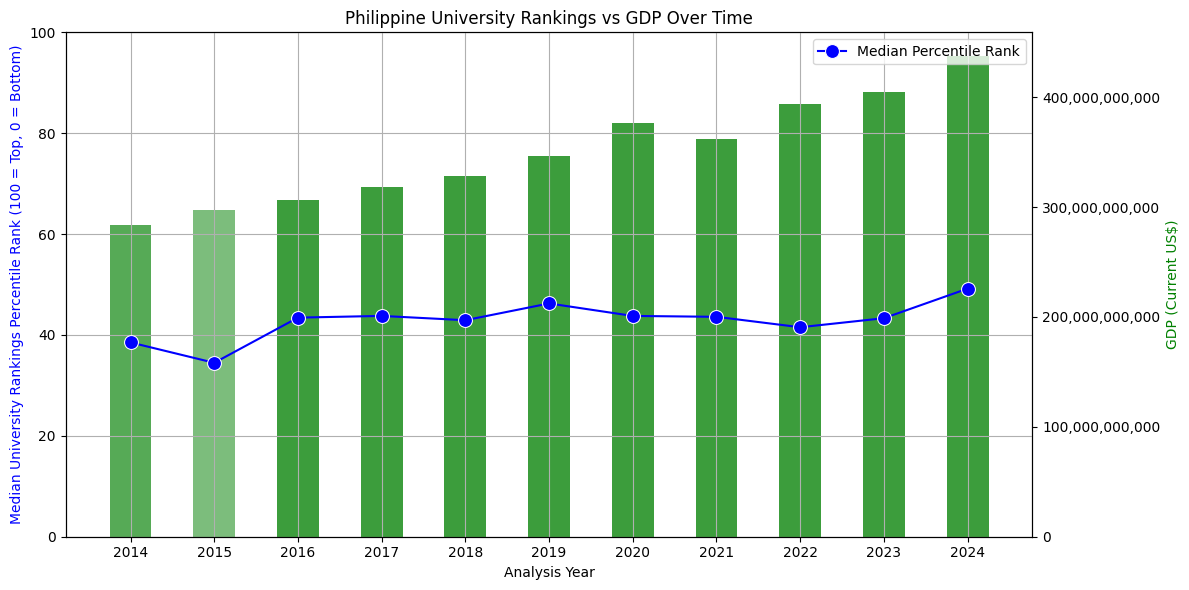

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Filter data for the Philippines
ph_data = merged_df[merged_df['country'] == 'Philippines']

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# --- First, plot the bars on ax2 ---
ax2.bar(
    ph_data['analysis_year'],
    ph_data['gdp_(current_us$)_[ny.gdp.mktp.cd]'],
    alpha=0.3,
    color='green',
    label='GDP (Current US$)',
    width=0.5,
    zorder=1
)
ax2.set_ylabel('GDP (Current US$)', color='green')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# --- Then, move ax1 above ax2 ---
ax1.set_zorder(1)
ax1.patch.set_visible(False)  # Hide the background of ax1 so bars show through

# --- Now plot the line on ax1 ---
sns.lineplot(
    data=ph_data,
    x='analysis_year',
    y='analysis_country_rank',
    marker='o',
    markersize=10,
    ax=ax1,
    color='blue',
    label='Median Percentile Rank',
    errorbar=None,
    zorder=2
)

ax1.set_ylabel('Median University Rankings Percentile Rank (100 = Top, 0 = Bottom)', color='blue')
ax1.set_ylim(0, 100)
ax1.set_xlabel('Analysis Year')
ax1.set_xticks(sorted(ph_data['analysis_year'].unique()))
ax1.grid(True)

# Title and layout
plt.title('Philippine University Rankings vs GDP Over Time')
fig.tight_layout()
plt.show()

We can see a rising trend in the Philippines' raw GDP, but there is no trend in the University Ranking percentile ranks. Just looking at the line and bar graphs, we can think that there is no connection between education and econmic performance.

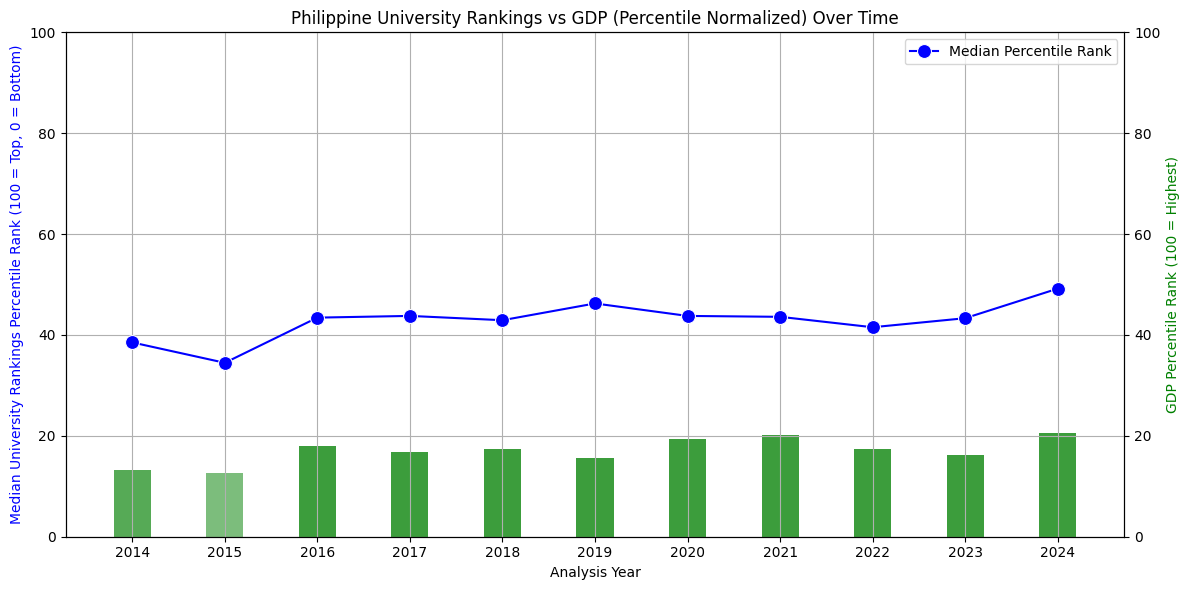

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

ph_data = merged_df[merged_df['country'] == 'Philippines']

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot: University percentile rank
sns.lineplot(
    data=ph_data,
    x='analysis_year',
    y='analysis_country_rank',
    marker='o',
    markersize=10,
    ax=ax1,
    color='blue',
    label='Median Percentile Rank',
    errorbar=None,
    zorder=2
)

ax1.set_ylabel('Median University Rankings Percentile Rank (100 = Top, 0 = Bottom)', color='blue')
ax1.set_ylim(0, 100)
ax1.set_xlabel('Analysis Year')
ax1.grid(True)

# Create secondary y-axis for GDP percentile
ax2 = ax1.twinx()

# --- Then, move ax1 above ax2 ---
ax1.set_zorder(1)
ax1.patch.set_visible(False)  # Hide the background of ax1 so bars show through

# Bar plot: GDP Percentile
ax2.bar(
    ph_data['analysis_year'],
    ph_data['analysis_gdp'],
    alpha=0.3,
    color='green',
    label='GDP Percentile Rank',
    width=0.4,
    zorder=1
)
ax2.set_ylabel('GDP Percentile Rank (100 = Highest)', color='green')
ax2.set_ylim(0, 100)

ax1.set_xticks(sorted(ph_data['analysis_year'].unique()))


# Title and layout
plt.title('Philippine University Rankings vs GDP (Percentile Normalized) Over Time')
fig.tight_layout()
plt.show()

Even without the a trend or pattern, the connection between the Philippines' poor economic performance and below average education performance can be a talking point. The instability of our economic performance can also spark a conversation with our stagnant and trendless performance in education.


## Top Performing in Education
We see from which country did the top ranked insitution in education of each year come from

In [310]:
import pandas as pd

# Sort the DataFrame by 'analysis_year' and then by 'percentile_rank' in descending order
sorted_df = merged_df.sort_values(by=['analysis_year', 'percentile_rank'], ascending=[True, False])

# Group by 'analysis_year' and get the first row of each group
highest_ranked = sorted_df.groupby('analysis_year').first().reset_index()

# Select the desired columns
result = highest_ranked[['analysis_year', 'institution', 'country', 'percentile_rank']]

result

,analysis_year,institution,country,percentile_rank
0,2014,Massachusetts Institute of Technology - MIT,United States,99.833887
1,2015,Massachusetts Institute of Technology - MIT,United States,99.833055
2,2016,Massachusetts Institute of Technology - MIT,United States,99.870130
3,2017,Massachusetts Institute of Technology - MIT,United States,99.875000
4,2018,Massachusetts Institute of Technology - MIT,United States,99.879808
5,2019,Massachusetts Institute of Technology - MIT,United States,99.880810
6,2020,Massachusetts Institute of Technology - MIT,United States,99.879952
7,2021,Massachusetts Institute of Technology - MIT,United States,99.879952
8,2022,Massachusetts Institute of Technology - MIT,United States,99.878788
9,2023,Massachusetts Institute of Technology - MIT,United States,99.880096


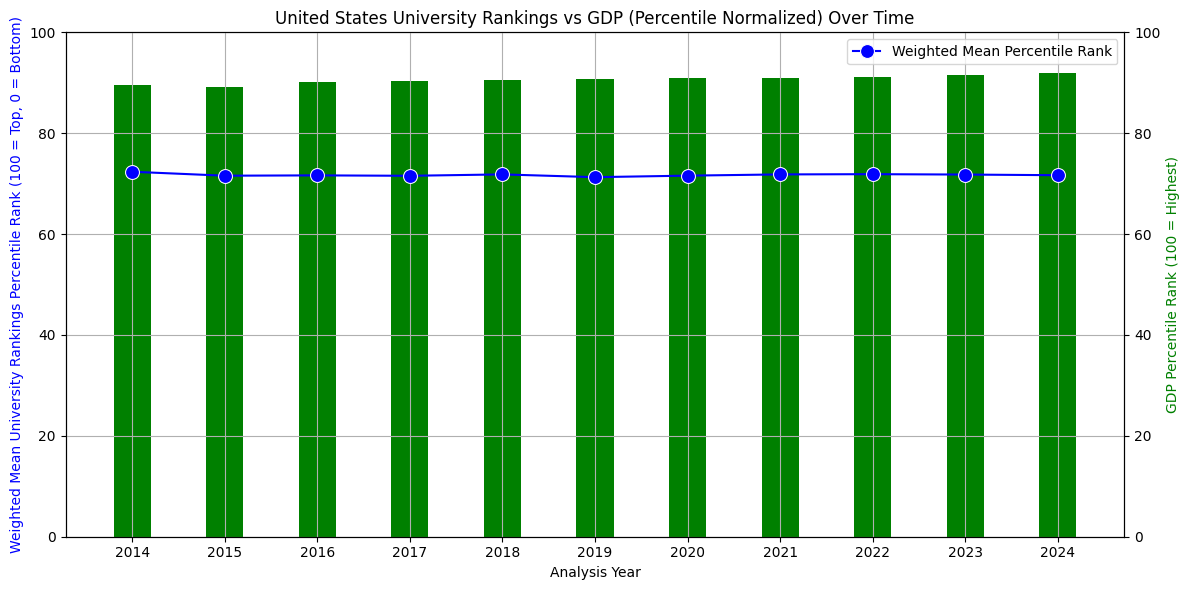

In [311]:
us_data = merged_df[merged_df['country'] == 'United States']

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot: University percentile rank
sns.lineplot(
    data=us_data,
    x='analysis_year',
    y='analysis_country_rank',
    marker='o',
    markersize=10,
    ax=ax1,
    color='blue',
    label='Weighted Mean Percentile Rank',
    errorbar=None,
    zorder=2
)

ax1.set_ylabel('Weighted Mean University Rankings Percentile Rank (100 = Top, 0 = Bottom)', color='blue')
ax1.set_ylim(0, 100)
ax1.set_xlabel('Analysis Year')
ax1.grid(True)

# Create secondary y-axis for GDP percentile
ax2 = ax1.twinx()

# --- Then, move ax1 above ax2 ---
ax1.set_zorder(1)
ax1.patch.set_visible(False)  # Hide the background of ax1 so bars show through

# Bar plot: GDP Percentile
ax2.bar(
    us_data['analysis_year'],
    us_data['analysis_gdp'],
    alpha=0.3,
    color='green',
    label='GDP Percentile Rank',
    width=0.4,
    zorder=1
)
ax2.set_ylabel('GDP Percentile Rank (100 = Highest)', color='green')
ax2.set_ylim(0, 100)

ax1.set_xticks(sorted(ph_data['analysis_year'].unique()))


# Title and layout
plt.title('United States University Rankings vs GDP (Percentile Normalized) Over Time')
fig.tight_layout()
plt.show()

If we check the country who topped the rankings in most of the years (...all years), which is the United States (MIT), we can see their high and stable economic performance in terms of GDP is also partnered with their high and (also) stable education performance.

## Middle Economic Performer
We see the middle ranked country in GDP of each year

In [312]:
# Get the country or countries that had the median GDP in each year
median_gdp = merged_df.groupby('analysis_year')['analysis_gdp'].median().reset_index()
median_gdp = median_gdp.rename(columns={'analysis_gdp': 'analysis_gdp_median'})
merged = merged_df.merge(median_gdp, on='analysis_year')
median_gdp_countries = merged[merged['analysis_gdp'] == merged['analysis_gdp_median']]
unique_countries_per_year = (
    median_gdp_countries[['analysis_year', 'country', 'analysis_gdp_median']]
    .drop_duplicates()
    .sort_values(['analysis_year', 'country'])
    .reset_index(drop=True)
)

unique_countries_per_year[['analysis_year', 'country', 'analysis_gdp_median']]

,analysis_year,country,analysis_gdp_median
0,2014,Italy,50.996678
1,2015,Russian Federation,50.083472
2,2016,Canada,50.324675
3,2017,Canada,49.937500
4,2018,"Korea, Rep.",48.377404
5,2019,"Korea, Rep.",51.311085
6,2020,Russian Federation,49.759904
7,2021,"Korea, Rep.",51.680672
8,2022,"Korea, Rep.",48.242424
9,2023,Brazil,49.940048


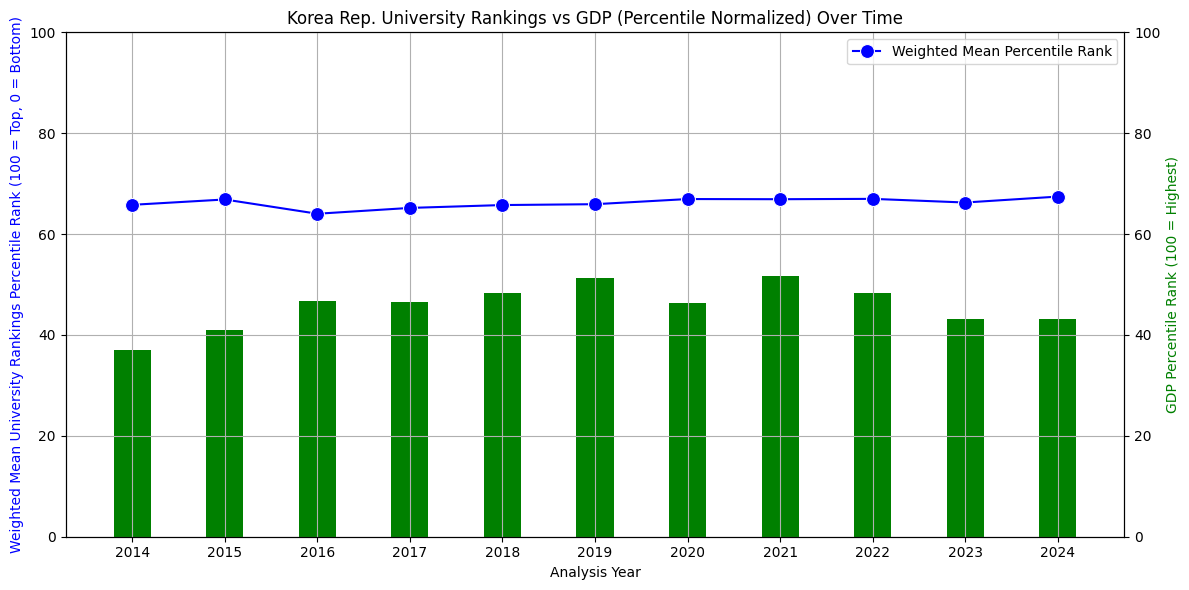

In [313]:
kor_data = merged_df[merged_df['country'] == 'Korea, Rep.']

# Plot setup
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line plot: University percentile rank
sns.lineplot(
    data=kor_data,
    x='analysis_year',
    y='analysis_country_rank',
    marker='o',
    markersize=10,
    ax=ax1,
    color='blue',
    label='Weighted Mean Percentile Rank',
    errorbar=None,
    zorder=2
)

ax1.set_ylabel('Weighted Mean University Rankings Percentile Rank (100 = Top, 0 = Bottom)', color='blue')
ax1.set_ylim(0, 100)
ax1.set_xlabel('Analysis Year')
ax1.grid(True)

# Create secondary y-axis for GDP percentile
ax2 = ax1.twinx()

# --- Then, move ax1 above ax2 ---
ax1.set_zorder(1)
ax1.patch.set_visible(False)  # Hide the background of ax1 so bars show through

# Bar plot: GDP Percentile
ax2.bar(
    kor_data['analysis_year'],
    kor_data['analysis_gdp'],
    alpha=0.3,
    color='green',
    label='GDP Percentile Rank',
    width=0.4,
    zorder=1
)
ax2.set_ylabel('GDP Percentile Rank (100 = Highest)', color='green')
ax2.set_ylim(0, 100)

ax1.set_xticks(sorted(ph_data['analysis_year'].unique()))


# Title and layout
plt.title('Korea Rep. University Rankings vs GDP (Percentile Normalized) Over Time')
fig.tight_layout()
plt.show()

Here we see that the country with the most median GDP rankings (Kor, Rep.), is higher than the Philippines but lower than the US in terms of both University rankings and GDP perfromance.

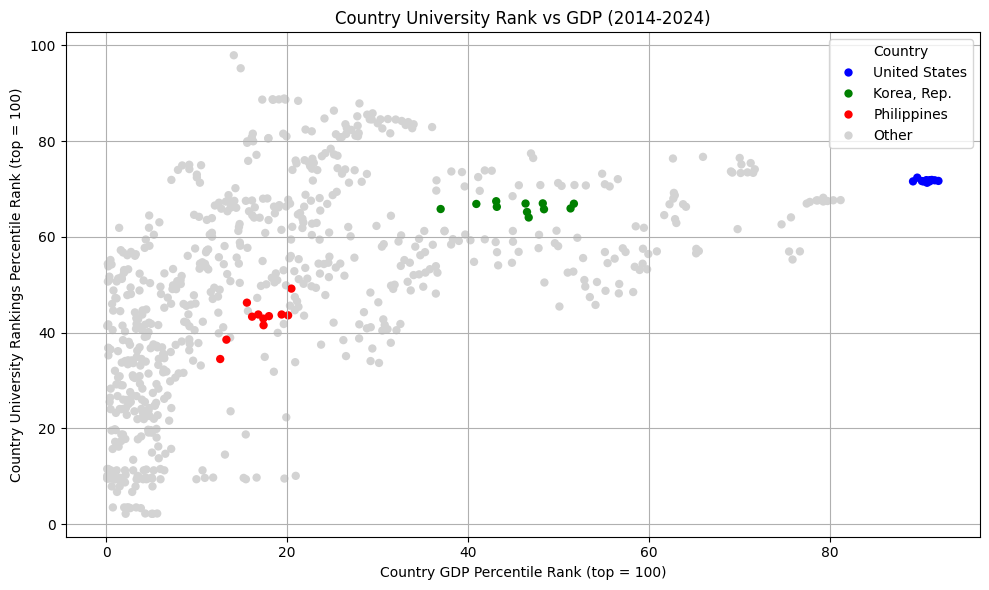

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid warnings
reduced_df = merged_df.drop_duplicates(subset=['analysis_year', 'country']).copy()

# Categorize countries
def label_country(country):
    if country == 'Philippines':
        return 'Philippines'
    elif country == 'United States':
        return 'United States'
    elif country == 'Korea, Rep.':
        return 'Korea, Rep.'
    else:
        return 'Other'

reduced_df['country_label'] = reduced_df['country'].apply(label_country)

# Define lighter colors
palette = {
    'United States': 'blue',
    'Korea, Rep.': 'green',
    'Philippines': 'red',
    'Other': '#d3d3d3'  # Light gray
}

# Custom order
hue_order = ['United States', 'Korea, Rep.', 'Philippines', 'Other']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=reduced_df,
    x='analysis_gdp',
    y='analysis_country_rank',
    hue='country_label',
    palette=palette,
    hue_order=hue_order,
    legend='full',
    edgecolor='none'
)

plt.xlabel('Country GDP Percentile Rank (top = 100)')
plt.ylabel('Country University Rankings Percentile Rank (top = 100)')
plt.title('Country University Rank vs GDP (2014-2024)')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

Each dot is a country. We can see a slight trend showing that a higher GDP ranking correlates to a higher university ranking.

# RQ 1: What are the economic and social factors that affect global university rankings?

## Random Forests
Extract meaningful features that are connected to the rankings by looking at their importance scores. Select features that are included in the 95% Cumulative Importance

In [315]:
# Set Target df
target_df = reduced_df['analysis_country_rank']

# Set Predictors df
predictor_cols = []

for column in reduced_df.columns:
    if column in ['analysis_country_rank', 'analysis_year']:
        continue
    if column.startswith('analysis_'):
        predictor_cols.append(column)

predictors_df = reduced_df[predictor_cols]
predictors_df

,analysis_foreign_direct_investment,analysis_gdp,analysis_gni_per_capita,analysis_scientific_and_technical_journal_articles,analysis_taxes_on_goods_and_services,analysis_population,analysis_control_of_corruption,analysis_government_effectiveness,analysis_rule_of_law,analysis_access_to_electricity,analysis_adolescent_fertility_rate,analysis_gdp_growth,analysis_inflation,analysis_population_growth,analysis_labor_force_participation_rate,analysis_unemployment,analysis_government_expenditure_on_education,analysis_merchandise_trade,analysis_school_enrollment
0,87.458472,89.617940,85.132890,89.617940,39.119601,87.956811,1.305925,1.516477,1.549428,100.0,26.528,2.117830,1.464833,0.692860,62.735,7.375,6.229258,23.154590,88.726418
1,54.485050,62.624585,40.365449,67.441860,72.093023,50.996678,1.718898,1.512267,1.689381,100.0,17.494,1.799921,2.291667,0.669741,61.976,7.704,5.525300,43.410362,56.762890
11,1.910299,25.166113,97.425249,27.491694,11.877076,10.880399,2.124894,1.816378,1.796046,100.0,3.119,1.792144,-0.217323,1.149880,67.602,4.747,4.913930,96.194760,56.181240
19,61.544850,45.598007,54.734219,50.747508,16.860465,31.644518,1.879378,1.780741,1.747508,100.0,11.529,2.325814,0.938292,1.053381,66.541,7.143,4.589010,50.584659,65.774300
21,59.385382,14.867110,98.920266,16.860465,3.073090,4.900332,2.070467,2.128066,1.697258,100.0,3.203,4.817631,2.358604,1.619308,67.768,3.860,2.854350,254.657412,83.940979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8498,20.228091,0.180072,0.420168,0.180072,46.638655,9.543818,-1.221095,-0.890728,-1.174122,99.7,28.854,6.151392,10.753277,1.769578,65.451,3.991,6.826947,111.963230,56.017593
8527,20.768307,1.200480,12.244898,0.720288,80.672269,2.400960,0.058400,-0.184130,-0.122018,100.0,13.487,8.300000,1.980419,0.728179,62.033,13.245,0.242600,86.038427,61.185799
8550,25.450180,2.881152,0.120048,2.160864,91.116447,42.496999,-1.042575,-0.549509,-0.474926,47.1,108.697,5.336973,5.350948,2.800832,80.820,2.787,2.551594,37.581284,4.756203
8564,20.408163,4.321729,12.364946,2.040816,3.361345,13.445378,-1.195471,-0.032642,-0.566586,100.0,35.293,1.123974,8.785430,0.120242,63.537,5.636,3.582900,70.738951,41.390759


Error per n:
10 estimators:  7.60506777701686 2.7577287352125226
20 estimators:  5.581462136438298 2.3625118277880217
30 estimators:  5.283410912664661 2.2985671433883894
40 estimators:  5.175942276063735 2.275069729934389
50 estimators:  5.140787048630124 2.267330379241218
60 estimators:  5.169274629016524 2.2736038856882095
70 estimators:  5.131556216588057 2.2652938477354447
80 estimators:  5.019457974362786 2.2404146880349596
90 estimators:  4.934464216310045 2.2213653945963157
100 estimators:  5.015962711762909 2.239634504057059
110 estimators:  4.982022252837099 2.2320444110360125
120 estimators:  4.9781040047601595 2.231166512109789
130 estimators:  5.06024915784922 2.249499757245868
140 estimators:  5.006278767577621 2.2374715121264943
150 estimators:  5.031580074251958 2.243118381684738
160 estimators:  5.003451263293465 2.2368395703075055
170 estimators:  5.03422585449956 2.243708059106523
180 estimators:  5.042776710155719 2.2456127694141124
190 estimators:  5.02632656310412

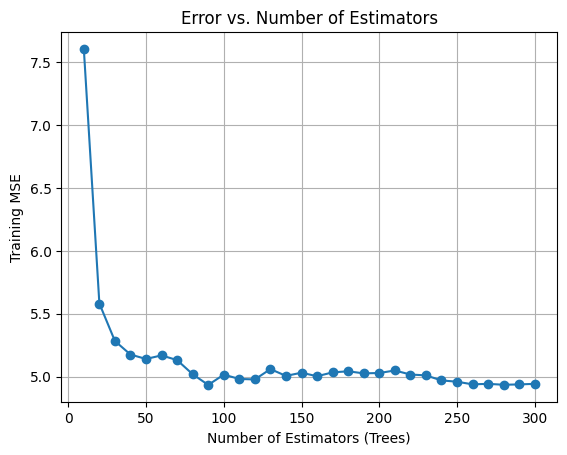

In [316]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Find optimal n_estimators
errors = []
estimator_range = range(10, 301, 10)

print('Error per n:')
for n in estimator_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(predictors_df, target_df)
    preds = model.predict(predictors_df)
    error = mean_squared_error(target_df, preds)
    errors.append(error)
    print(f'{n} estimators: ', error, np.sqrt(error))
    

plt.plot(estimator_range, errors, marker='o')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Training MSE')
plt.title('Error vs. Number of Estimators')
plt.grid(True)
plt.show()

Use 120 n_estimators (for random_state = 42) since rate of error drop decreases and plot flattens. Next, we Get importance scores of eacg predictor

In [317]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Step 1: Initialize the model
rf = RandomForestRegressor(n_estimators=120, random_state=42)

# Step 2: Fit the model
rf.fit(predictors_df, target_df)

# Step 3: Get feature importances
importances = rf.feature_importances_

# Step 4: Create a DataFrame for easy viewing
importance_df = pd.DataFrame({
    'feature': predictors_df.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
1,analysis_gdp,0.293710
8,analysis_rule_of_law,0.282610
7,analysis_government_effectiveness,0.116176
3,analysis_scientific_and_technical_journal_arti...,0.060118
10,analysis_adolescent_fertility_rate,0.052628
14,analysis_labor_force_participation_rate,0.031499
2,analysis_gni_per_capita,0.026987
6,analysis_control_of_corruption,0.023685
16,analysis_government_expenditure_on_education,0.019728
18,analysis_school_enrollment,0.018900


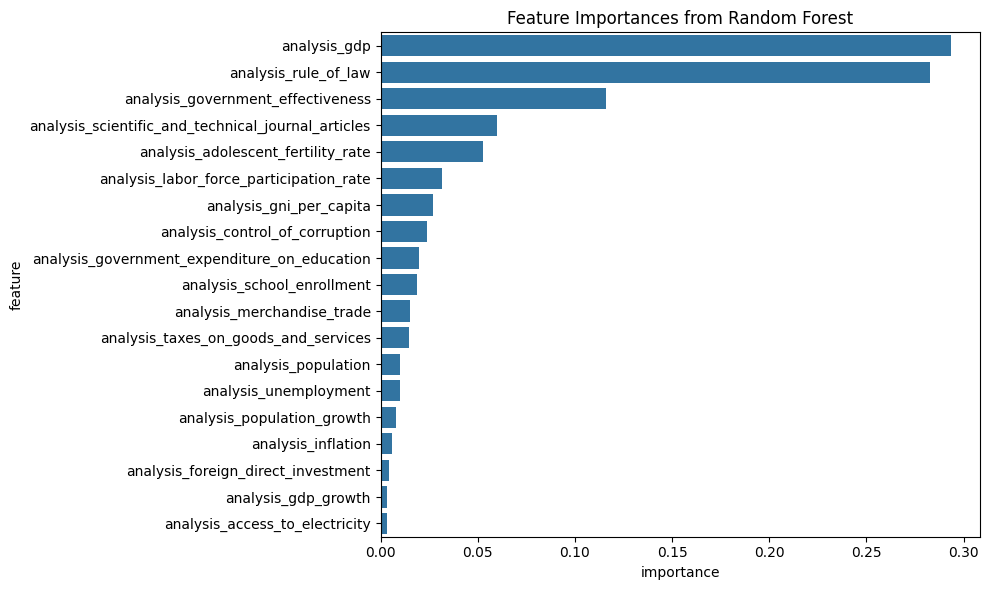

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot importance scores

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [319]:
# Keep features that is within 95% Cumulative Importance
importance_df['cumulative_importance'] = importance_df['importance'].cumsum()
selected_features = importance_df[importance_df['cumulative_importance'] <= 0.95]['feature'].tolist()
selected_features

['analysis_gdp',
 'analysis_rule_of_law',
 'analysis_government_effectiveness',
 'analysis_scientific_and_technical_journal_articles',
 'analysis_adolescent_fertility_rate',
 'analysis_labor_force_participation_rate',
 'analysis_gni_per_capita',
 'analysis_control_of_corruption',
 'analysis_government_expenditure_on_education',
 'analysis_school_enrollment',
 'analysis_merchandise_trade']

# RQ 2: Do countries with similar indicator values also have similar rankings? (Focused on PH)

## Hierarchical Clustering 
Determine how many clusters there are that show similar countries in terms of indicators 

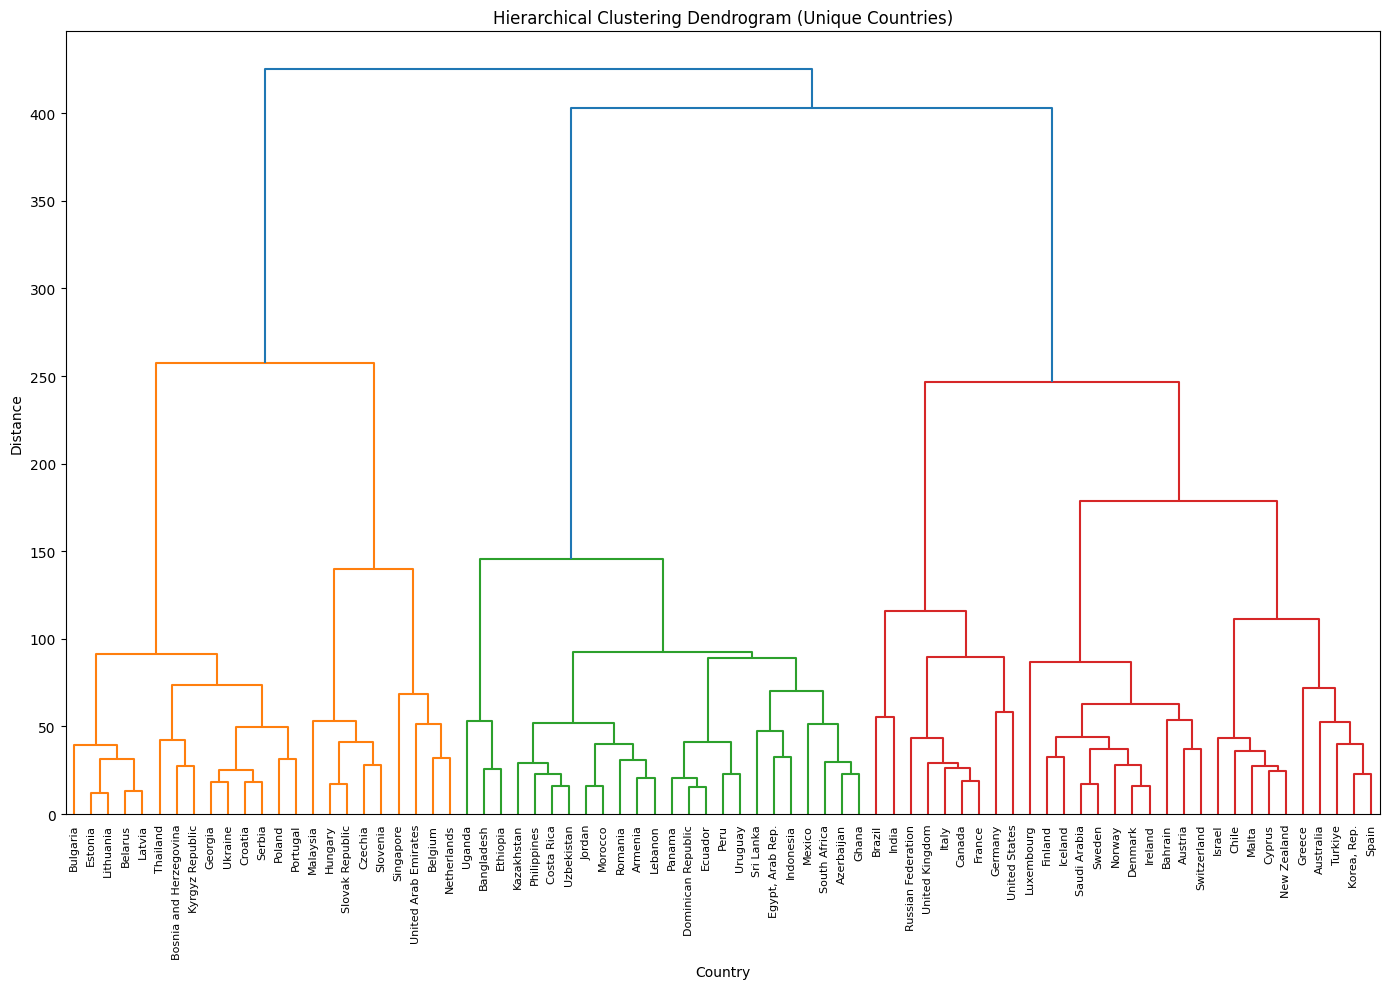

In [320]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

selected_df = reduced_df[selected_features + ['country', 'analysis_country_rank']].copy()

# 1. Aggregate the data: one row per country
agg_df = selected_df.groupby('country')[selected_features + ['analysis_country_rank']].mean().reset_index()

# 2. Perform hierarchical clustering
Z = linkage(agg_df[selected_features], method='ward')

# 3. Plot dendrogram with unique country names
plt.figure(figsize=(14, 10))
dendrogram(Z, labels=agg_df['country'].values, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (Unique Countries)")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

Choose 3 clusters (first 2 splits) then see defining indicators for each cluster

In [321]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(Z, t=3, criterion='maxclust')
agg_df['cluster'] = labels

for cluster in sorted(agg_df['cluster'].unique()):
    print(f"Cluster {cluster}:")
    print(agg_df[agg_df['cluster'] == cluster]['country'].values)
    print()

Cluster 1:
['Belarus' 'Belgium' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia'
 'Czechia' 'Estonia' 'Georgia' 'Hungary' 'Kyrgyz Republic' 'Latvia'
 'Lithuania' 'Malaysia' 'Netherlands' 'Poland' 'Portugal' 'Serbia'
 'Singapore' 'Slovak Republic' 'Slovenia' 'Thailand' 'Ukraine'
 'United Arab Emirates']

Cluster 2:
['Armenia' 'Azerbaijan' 'Bangladesh' 'Costa Rica' 'Dominican Republic'
 'Ecuador' 'Egypt, Arab Rep.' 'Ethiopia' 'Ghana' 'Indonesia' 'Jordan'
 'Kazakhstan' 'Lebanon' 'Mexico' 'Morocco' 'Panama' 'Peru' 'Philippines'
 'Romania' 'South Africa' 'Sri Lanka' 'Uganda' 'Uruguay' 'Uzbekistan']

Cluster 3:
['Australia' 'Austria' 'Bahrain' 'Brazil' 'Canada' 'Chile' 'Cyprus'
 'Denmark' 'Finland' 'France' 'Germany' 'Greece' 'Iceland' 'India'
 'Ireland' 'Israel' 'Italy' 'Korea, Rep.' 'Luxembourg' 'Malta'
 'New Zealand' 'Norway' 'Russian Federation' 'Saudi Arabia' 'Spain'
 'Sweden' 'Switzerland' 'Turkiye' 'United Kingdom' 'United States']



In [322]:

# Calculate mean across all data
overall_mean = agg_df[selected_features].mean()

# Mean for each of the 3 clusters
means_split2 = agg_df.groupby('cluster')[selected_features].mean()

# Compute deviation from overall mean for each cluster
deviation = (means_split2 - overall_mean).abs()

# Get top indicators per cluster
print("\n🔍 Top Indicators for Each Cluster (Second Split, 3 clusters):")
for cluster in deviation.index:
    print(f"\nCluster {cluster}:")
    print(deviation.loc[cluster].sort_values(ascending=False).head(5))


🔍 Top Indicators for Each Cluster (Second Split, 3 clusters):

Cluster 1:
analysis_merchandise_trade                            50.257596
analysis_adolescent_fertility_rate                     9.007273
analysis_gdp                                           8.683254
analysis_school_enrollment                             6.063611
analysis_scientific_and_technical_journal_articles     6.031125
Name: 1, dtype: float64

Cluster 2:
analysis_adolescent_fertility_rate                    24.885523
analysis_gni_per_capita                               24.051865
analysis_merchandise_trade                            24.015947
analysis_school_enrollment                            23.675954
analysis_scientific_and_technical_journal_articles    11.336414
Name: 2, dtype: float64

Cluster 3:
analysis_gni_per_capita                               20.839223
analysis_merchandise_trade                            19.318066
analysis_school_enrollment                            14.291995
analysis_gdp         

## Difference of Mean Country University Ranks Among Clusters
Check normality (and variance equality if needed) to determine which test to use.
Use appropriate test to see if the mean university ranks are significantly different per cluster:
- ANOVA: Normal + Equal Variance
- Welch's ANOV: Normal + Not Equal Variance
- Kruskal-Wallis: Not Normal

Cluster 1: p = 0.25737
 -> ✅ Normally distributed


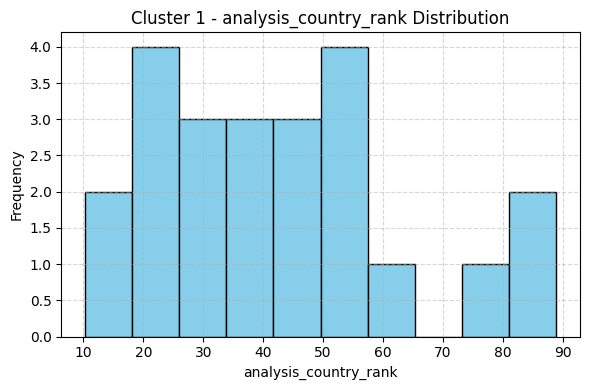

Cluster 2: p = 0.00217
 -> ❌ Not normally distributed


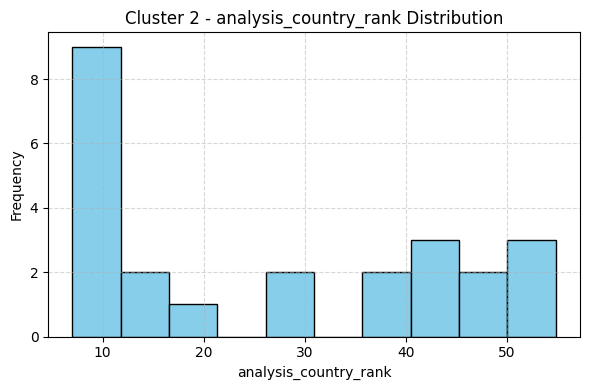

Cluster 3: p = 0.03306
 -> ❌ Not normally distributed


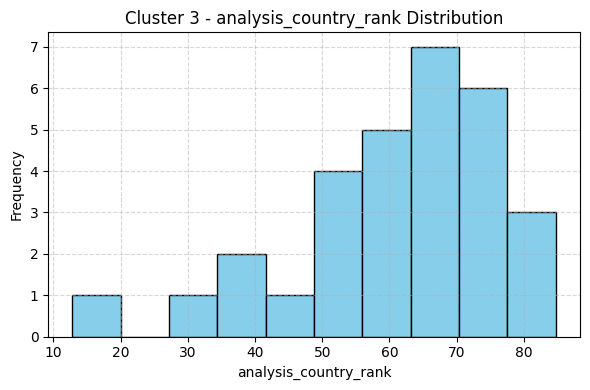

In [323]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

for i in sorted(agg_df['cluster'].unique()):
    data = agg_df[agg_df['cluster'] == i]['analysis_country_rank']
    stat, p = shapiro(data)
    print(f"Cluster {i}: p = {p:.5f}")
    if p < 0.05:
        print(" -> ❌ Not normally distributed")
    else:
        print(" -> ✅ Normally distributed")

    # Plot histogram
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Cluster {i} - analysis_country_rank Distribution')
    plt.xlabel('analysis_country_rank')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

Use Kruskal-Wallis because at least 1 is not normal.

In [324]:
from scipy.stats import kruskal

# Step 1: Group 'analysis_country_rank' by cluster
group1 = agg_df[agg_df['cluster'] == 1]['analysis_country_rank']
group2 = agg_df[agg_df['cluster'] == 2]['analysis_country_rank']
group3 = agg_df[agg_df['cluster'] == 3]['analysis_country_rank']

# Step 2: Run Kruskal-Wallis test
h_stat, p_value = kruskal(group1, group2, group3)

# Step 3: Print result
print(f"Kruskal-Wallis H-statistic: {h_stat:.3f}")
print(f"Kruskal-Wallis p-value: {p_value:.5f}")

if p_value < 0.05:
    print("✅ The distributions of 'analysis_country_rank' differ significantly between at least two clusters.")
else:
    print("❌ No statistically significant difference in distributions between clusters.")

Kruskal-Wallis H-statistic: 32.109
Kruskal-Wallis p-value: 0.00000
✅ The distributions of 'analysis_country_rank' differ significantly between at least two clusters.


## Similarity Within Clusters
Use Coefficient of Variance and statistical measures to see if countries in the same cluster have similar ranks, and look at other statistical measures that describes the cluster.

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr, skew, kurtosis

# Loop through each cluster
for cluster_id in sorted(agg_df['cluster'].unique()):
    cluster_data = agg_df[agg_df['cluster'] == cluster_id]['analysis_country_rank']
    
    mean_val = cluster_data.mean()
    std_val = cluster_data.std()
    cv = (std_val / mean_val) * 100 if mean_val != 0 else np.nan
    iqr_val = iqr(cluster_data)
    skew_val = skew(cluster_data)
    kurt_val = kurtosis(cluster_data)
    
    print(f"\n📊 Cluster {cluster_id}")
    print(f"- Mean: {mean_val:.2f}")
    print(f"- Standard Deviation: {std_val:.2f}")
    print(f"- Coefficient of Variation (CV): {cv:.2f}%")
    print(f"- Interquartile Range (IQR): {iqr_val:.2f}")
    print(f"- Skewness: {skew_val:.2f}")
    print(f"- Kurtosis: {kurt_val:.2f}")
    



📊 Cluster 1
- Mean: 42.06
- Standard Deviation: 21.26
- Coefficient of Variation (CV): 50.54%
- Interquartile Range (IQR): 24.37
- Skewness: 0.64
- Kurtosis: -0.30

📊 Cluster 2
- Mean: 26.96
- Standard Deviation: 17.87
- Coefficient of Variation (CV): 66.29%
- Interquartile Range (IQR): 33.77
- Skewness: 0.26
- Kurtosis: -1.58

📊 Cluster 3
- Mean: 60.57
- Standard Deviation: 15.49
- Coefficient of Variation (CV): 25.58%
- Interquartile Range (IQR): 17.03
- Skewness: -1.13
- Kurtosis: 1.53


The countries in each cluster do not have similar rankings.

# RQ 3: Can rankings be predicted?

In [326]:
target_df = reduced_df['analysis_country_rank']
reduced_predictors_df = reduced_df[selected_features]

models = ['Linear Regression', 'MLP Regressor', 'Random Forest']

# Replace these values with the actual computed ones if different
r2_values = []  # Example values
mse_values = []   # Example values
mae_values = []   # Example values
rmse_values = []

## Linear Regression
Handles linear predictions

In [327]:
import pandas as pd

# 1. Compute correlations with the target
correlations = reduced_df[selected_features].corrwith(reduced_df['analysis_country_rank'])

# 2. Filter for strong correlations (>|0.5|) — either positively or negatively
strong_corr = correlations[correlations.abs() >= 0.5]

# 3. Show the result
print("Selected features with strong correlation:")
print(strong_corr)

# 4. Keep only strongly correlated features
strong_features = strong_corr.index.tolist()

Selected features with strong correlation:
analysis_gdp                                          0.540718
analysis_rule_of_law                                  0.604905
analysis_government_effectiveness                     0.656910
analysis_scientific_and_technical_journal_articles    0.522066
analysis_adolescent_fertility_rate                   -0.522008
analysis_gni_per_capita                               0.635967
analysis_control_of_corruption                        0.649339
dtype: float64


In [328]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prepare data
X = reduced_df[strong_features]
y = reduced_df['analysis_country_rank']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2_values.append(r2)
mse_values.append(mse)
mae_values.append(mae)
rmse_values.append(rmse)

# 6. Print metrics
print(f"\nLinear Regression Performance:")
print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


Linear Regression Performance:
R² Score: 0.574
MSE: 194.258
MAE: 11.115
RMSE: 13.938


## Multi-Layer Perceptron
Handles non-linear predictions

In [329]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Prepare your features and target
X = reduced_predictors_df
y = target_df

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features (MLP is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train the MLP regressor
mlp = MLPRegressor(hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
                   activation='relu',          # common activation function
                   solver='adam',              # optimizer
                   max_iter=1000,              # increase if convergence warnings appear
                   random_state=42)

mlp.fit(X_train_scaled, y_train)

# 5. Predict
y_pred = mlp.predict(X_test_scaled)

# 6. Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

r2_values.append(r2)
mse_values.append(mse)
mae_values.append(mae)
rmse_values.append(rmse)

print(f"\nMLP Performance:")
print(f"MLP R² Score: {r2:.3f}")
print(f"MLP MSE: {mse:.3f}")
print(f"MLP MAE: {mae:.3f}")
print(f"MLP RMSE: {rmse:.3f}")

/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



MLP Performance:
MLP R² Score: 0.826
MLP MSE: 79.291
MLP MAE: 6.595
MLP RMSE: 8.905


/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/gabrielramos/Desktop/132 EDA/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Random Forest
Handles both linear, non-linear, interactive data, and threshold effects

In [330]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 1. Prepare data
X = reduced_df[selected_features]
y = reduced_df['analysis_country_rank']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Fit Random Forest Regressor
rf = RandomForestRegressor(n_estimators=120, random_state=42)
rf.fit(X_train, y_train)

# 4. Predict
y_pred = rf.predict(X_test)

# 5. Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

r2_values.append(r2)
mse_values.append(mse)
mae_values.append(mae)
rmse_values.append(rmse)

print(f"\nRandom Forest Performance:")
print(f"Random Forest R² Score: {r2:.3f}")
print(f"Random Forest MSE: {mse:.3f}")
print(f"Random Forest MAE: {mae:.3f}")
print(f"Random Forest RMSE: {rmse:.3f}")


Random Forest Performance:
Random Forest R² Score: 0.888
Random Forest MSE: 50.972
Random Forest MAE: 4.655
Random Forest RMSE: 7.139


## Results

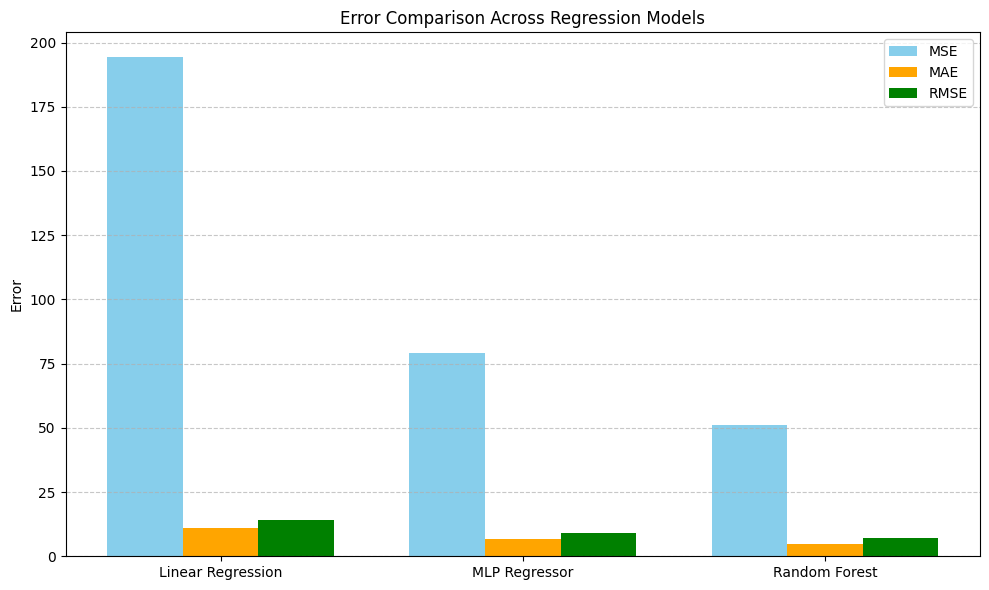

In [331]:
# Bar width and position
x = np.arange(len(models))
width = 0.25

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width, mse_values, width, label='MSE', color='skyblue')
plt.bar(x, mae_values, width, label='MAE', color='orange')
plt.bar(x + width, rmse_values, width, label='RMSE', color='green')

plt.xticks(x, models)
plt.ylabel('Error')
plt.title('Error Comparison Across Regression Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Random Forests performed the best, having the smallest error values for all metrics.

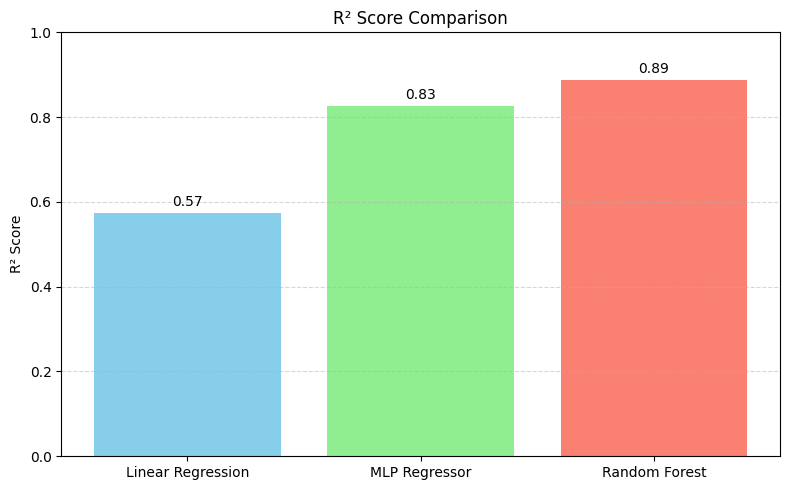

In [332]:
# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_values, color=['skyblue', 'lightgreen', 'salmon'])

# Add value labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Random Forest also had the highes r2 score among the models, meaning it explains 89% of the variance of the mean percentile ranks of countries.